# Fisher Information and Effective Dimension Plots

This Jupyter notebook was created by [Umberto Borso](https://www.linkedin.com/in/umberto-borso-1990a11a1/) and is part of the Semester Project titled *"Quantum Advantage in Machine Learning: Investigating Entanglement and Quantum Feature Maps in Neural Networks"*. This nootebook contains the code used to generate the plots for Fisher Information and Effective Dimension of the analyzed QNN structures. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
plt.style.use('seaborn') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : False,  # Disable TeX rendering
          "font.family" : "serif",
          "font.serif" : ["Times New Roman"]}  # Change the font here
plt.rcParams.update(params)

path_fm = './NPY_files/FeatureMaps/'
path_vc = './NPY_files/VariationalCircuits/'
colors_fm = ["red", "blue", "green", "orange", "purple", "yellow", "cyan", "magenta", "lime"]
colors_vc =  ["red", "blue", "green", "orange", "purple", "yellow", "cyan", "magenta", "lime"]
titles_fm = ['FM' + str(i) for i in range(1,8)]
titles_vc = ['VC' + str(i) for i in range(1,10)]

/var/folders/jc/0syfv27n0s37cg9l4jsm306w0000gn/T/ipykernel_2041/1595195869.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # I personally prefer seaborn for the graph style, but you may choose whichever you want.


## Effective Dimension: Feature Maps

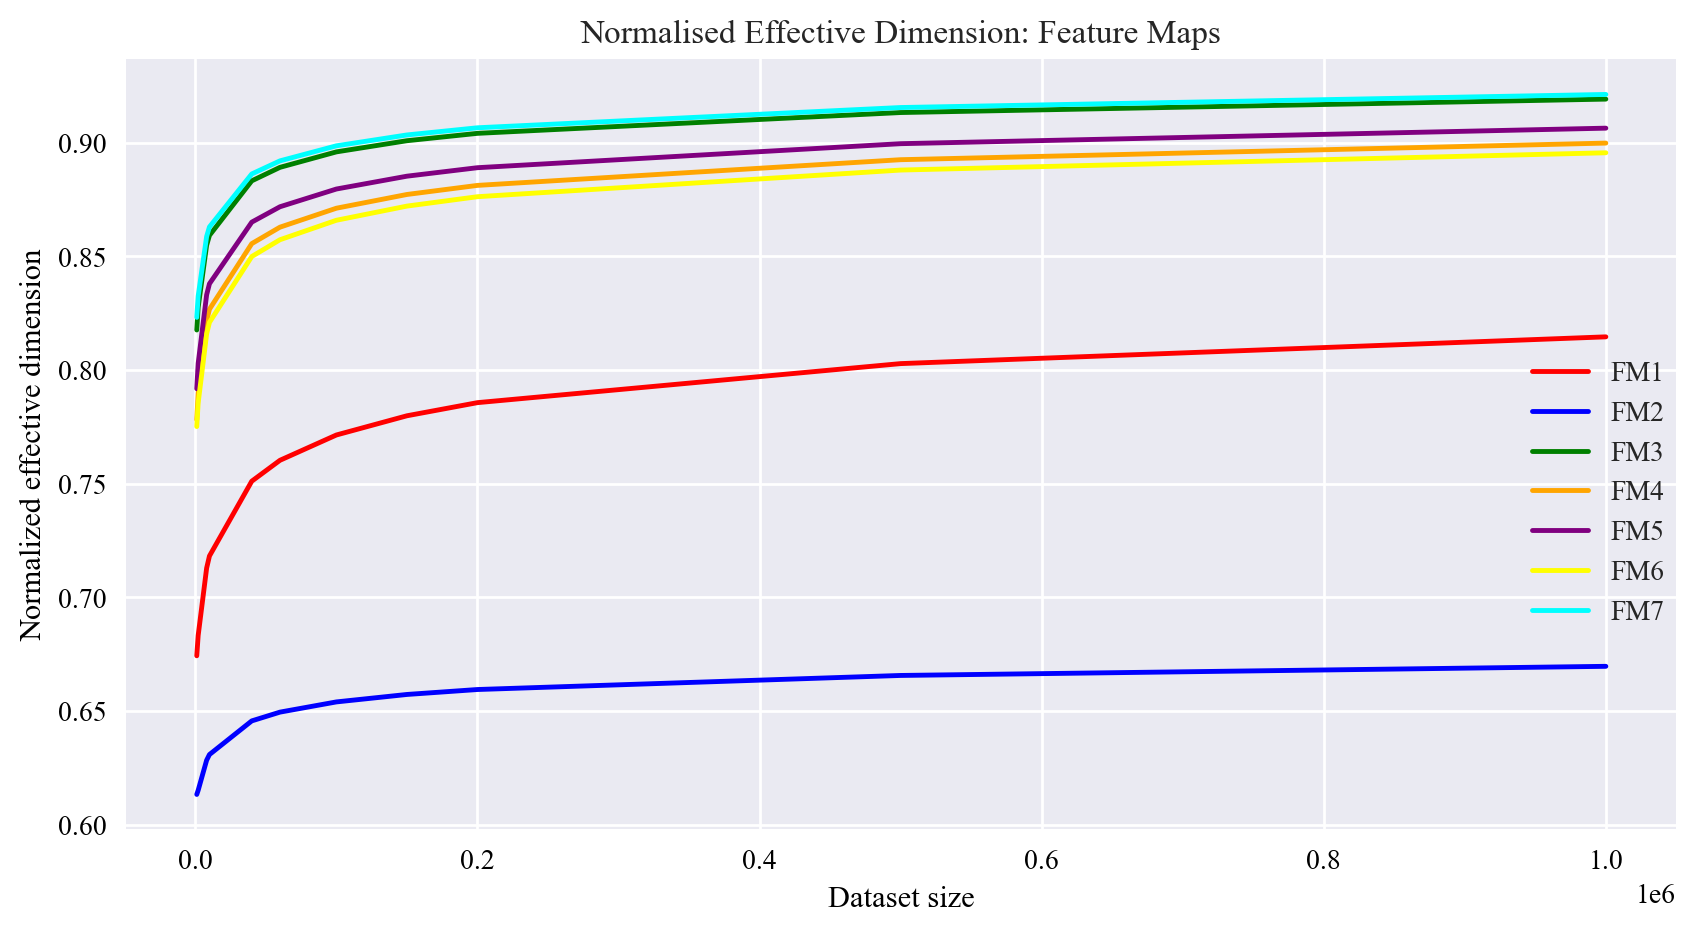

In [9]:
n = [1000, 2000, 8000, 10000, 40000, 60000, 100000, 150000, 200000, 500000, 1000000]
d = 40

# load data
FM_fisher = {}
FM_norm_fisher = {}
FM_eff_dim = {}

plt.figure(figsize=[10,5],dpi=200)
plt.title('Normalised Effective Dimension: Feature Maps')
for index,file in enumerate(titles_fm):
    FM_fisher[file], FM_norm_fisher[file], FM_eff_dim[file] = np.load(path_fm + file + "_fne.npy",allow_pickle=True)
    
    label = titles_fm[index]
    plt.plot(n, np.array(FM_eff_dim[file]) / d, label = label,color=colors_fm[index])
    # print(label, FM_eff_dim[file][-1]/d)

plt.xlabel("Dataset size")
plt.ylabel("Normalized effective dimension")
plt.legend(loc=(0.9,0.25))
plt.savefig('../Figures/FM_effdim.png',dpi=300)
plt.show()


## Effective Dimension: Variational Circuits

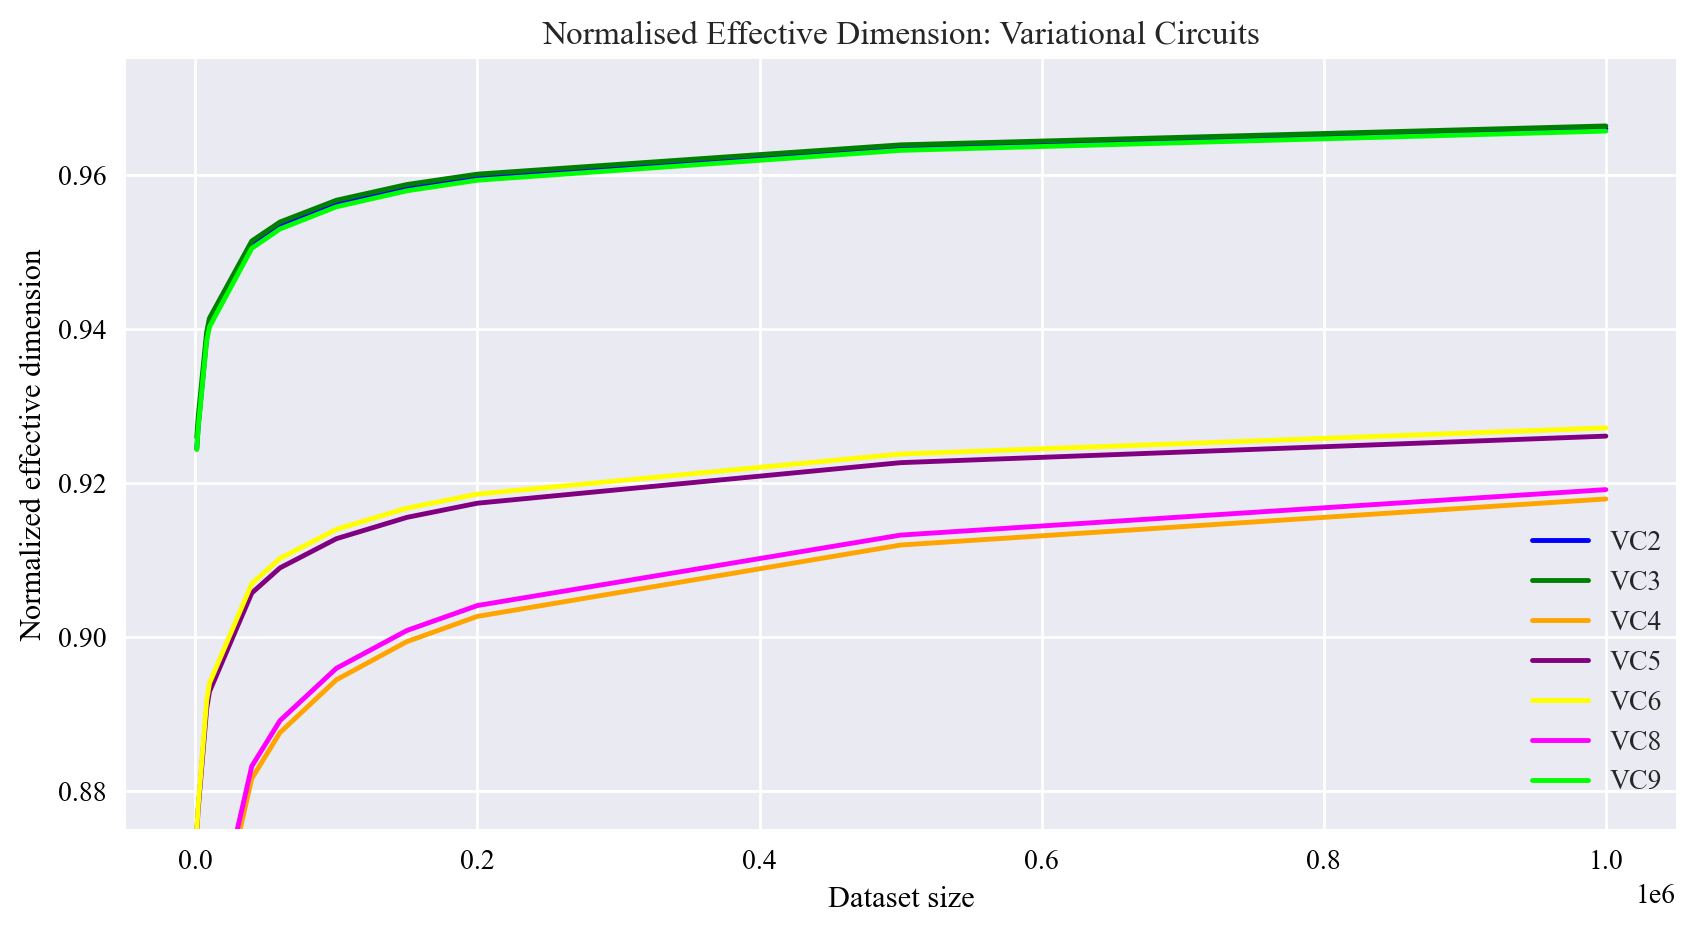

In [10]:
# load data
VC_fisher = {}
VC_norm_fisher = {}
VC_eff_dim = {}

plt.figure(figsize=[10,5],dpi=200)
plt.title('Normalised Effective Dimension: Variational Circuits')
for index,file in enumerate(titles_vc):
    VC_fisher[file], VC_norm_fisher[file], VC_eff_dim[file] = np.load(path_vc + file + "_fne.npy",allow_pickle=True)
    if VC_eff_dim[file][0]/d>0.8:
        label = titles_vc[index]
        plt.plot(n, np.array(VC_eff_dim[file]) / d, label = label,color=colors_vc[index])

plt.xlabel("Dataset size")
plt.ylabel("Normalized effective dimension")
plt.legend(loc=(0.9,0.03))
plt.ylim(0.875,0.975)
plt.savefig('../Figures/VCzoom_effdim.png',dpi=300)
plt.show()

In [5]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

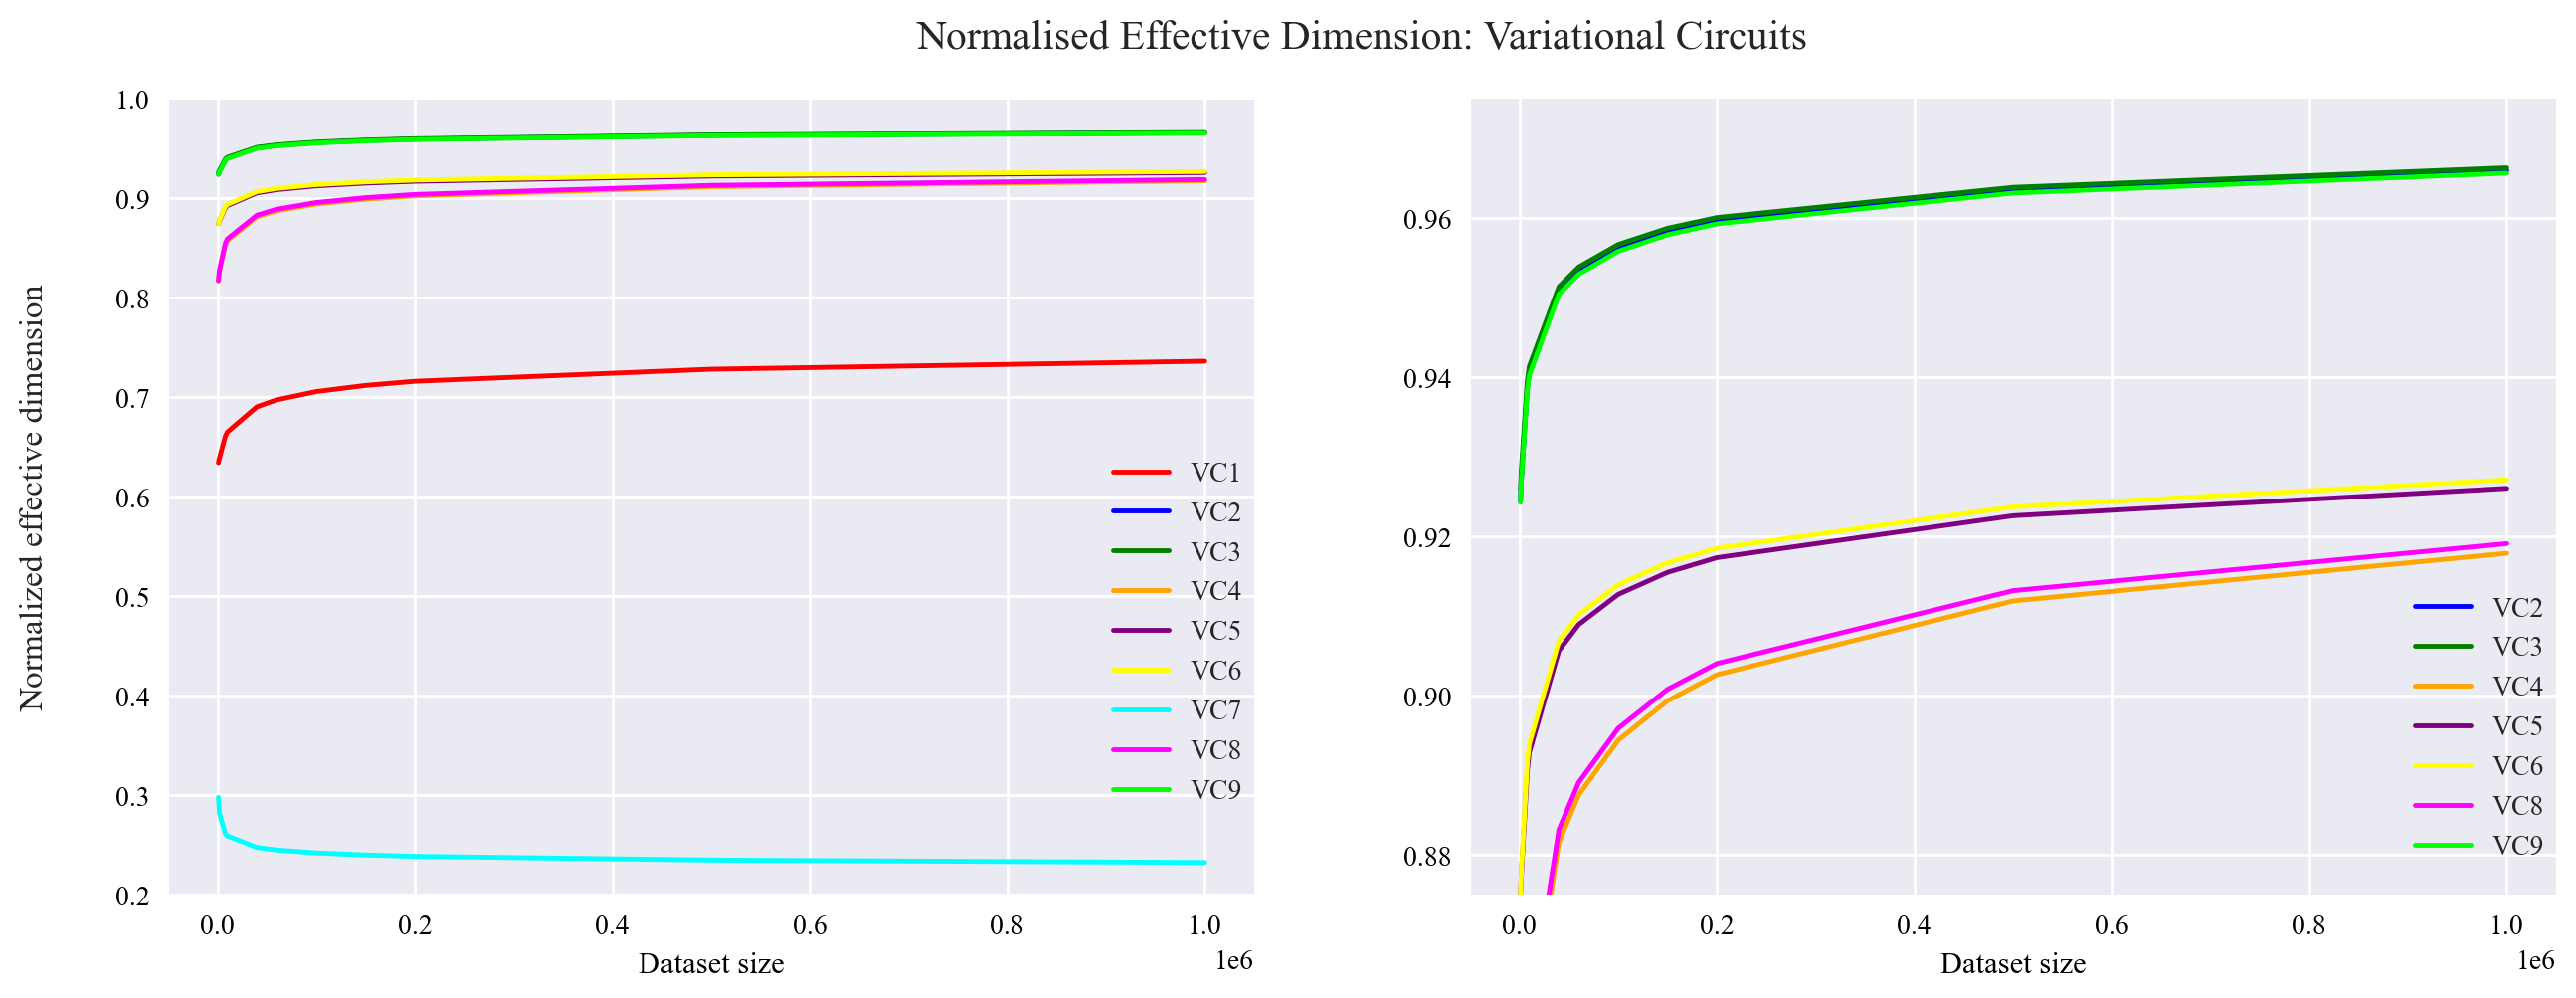

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,5),dpi=200)
from matplotlib import rc
import matplotlib.pylab as plt

# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
fig.suptitle('Normalised Effective Dimension: Variational Circuits',fontsize=15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)


VC_fisher = {}
VC_norm_fisher = {}
VC_eff_dim = {}

for index,file in enumerate(titles_vc):
    VC_fisher[file], VC_norm_fisher[file], VC_eff_dim[file] = np.load(path_vc + file + "_fne.npy",allow_pickle=True)
    if VC_eff_dim[file][0]/d>0.8:
        label = titles_vc[index]
        axes[1].plot(n, np.array(VC_eff_dim[file]) / d, label = label,color=colors_vc[index])

axes[1].legend(loc=(0.86,0.03))
axes[1].set_ylim(0.875,0.975)

for index,file in enumerate(titles_vc):
    VC_fisher[file], VC_norm_fisher[file], VC_eff_dim[file] = np.load(path_vc + file + "_fne.npy",allow_pickle=True)
    if VC_eff_dim[file][0]/d>0.0:
        label = titles_vc[index]
        axes[0].plot(n, np.array(VC_eff_dim[file]) / d, label = label,color=colors_vc[index])
        # print(label, VC_eff_dim[file][-1]/d)


axes[0].legend(loc=(0.86,0.1))
axes[0].set_ylim(0.2,1)
axes[0].set_xlabel('Dataset size')
axes[1].set_xlabel('Dataset size')

fig.supylabel('Normalized effective dimension',x=0.05)
plt.savefig('../Figures/VCdouble_effdim.png',dpi=300)
plt.show()

## Fisher Information Spectrum : Feature Maps

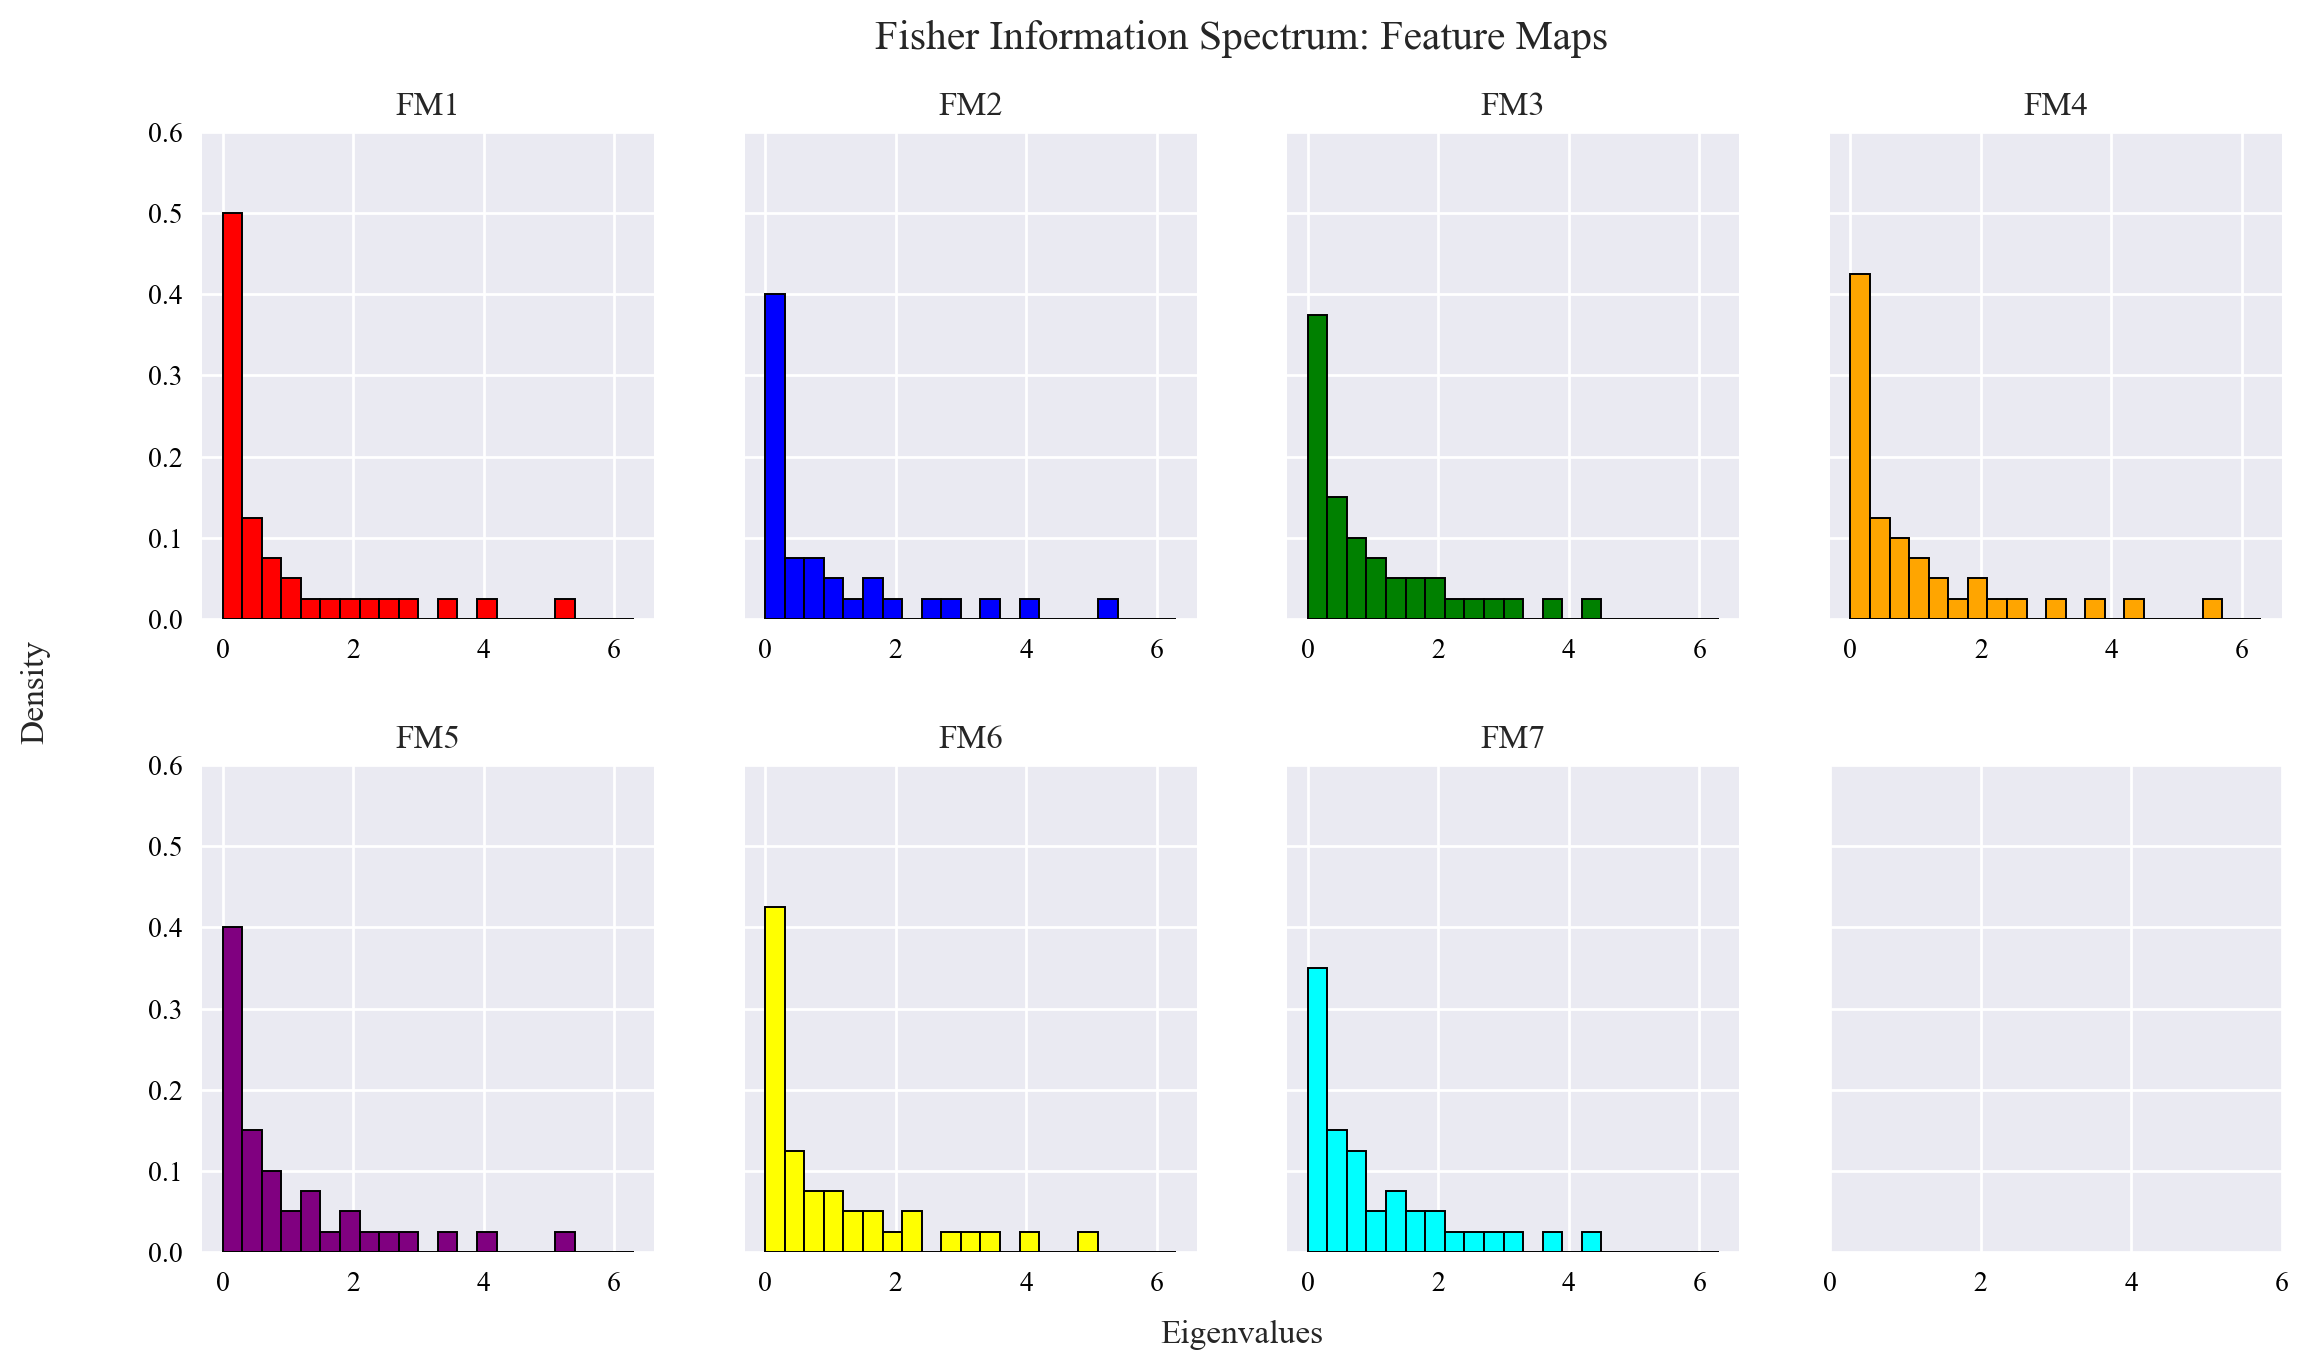

In [12]:
eig_val = {}

fig, axes = plt.subplots(2, 4, sharex=False, sharey=True, figsize=(13,7),dpi=200)
from matplotlib import rc
import matplotlib.pylab as plt

# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
fig.suptitle('Fisher Information Spectrum: Feature Maps',fontsize=15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.3)

plt.setp(axes, xticks=[0, 2, 4,6])

FM_norm_fisher['Z_only'] = np.load('/Users/umbertoborso/Library/Mobile Documents/com~apple~CloudDocs/ETH/Semester 2/Semester Project/QNN/amyami187-effective_dimension-5d9a9b6/Effective_dimension_plots/data/4qubits_9layer_f_hats_pauli.npy')
for index,file in enumerate(titles_fm):
    eig_val[file] = []
    for i in range(100):
        eig_val[file].append(np.linalg.eigh(FM_norm_fisher[file][i])[0])
    eig_val[file] = np.average(eig_val[file], axis=0)

    n,bins,_ = axes[index//4,index%4].hist(eig_val[file], bins=np.arange(0,6.5,0.3),weights=np.zeros_like(eig_val[file]) + 1. / eig_val[file].size,color=colors_fm[index],edgecolor='black',linewidth=0.7)
    # print(n[0])
    axes[index//4,index%4].set_ylim((0,0.6))
    axes[index//4,index%4].set_title(titles_fm[index])

fig.supxlabel('Eigenvalues',y=0.03)
fig.supylabel('Density',x=0.03)
plt.savefig('../Figures/FM_fisher_spectrum.png',dpi=300)
plt.show()


## Fisher Information Spectrum : Variational Circuits

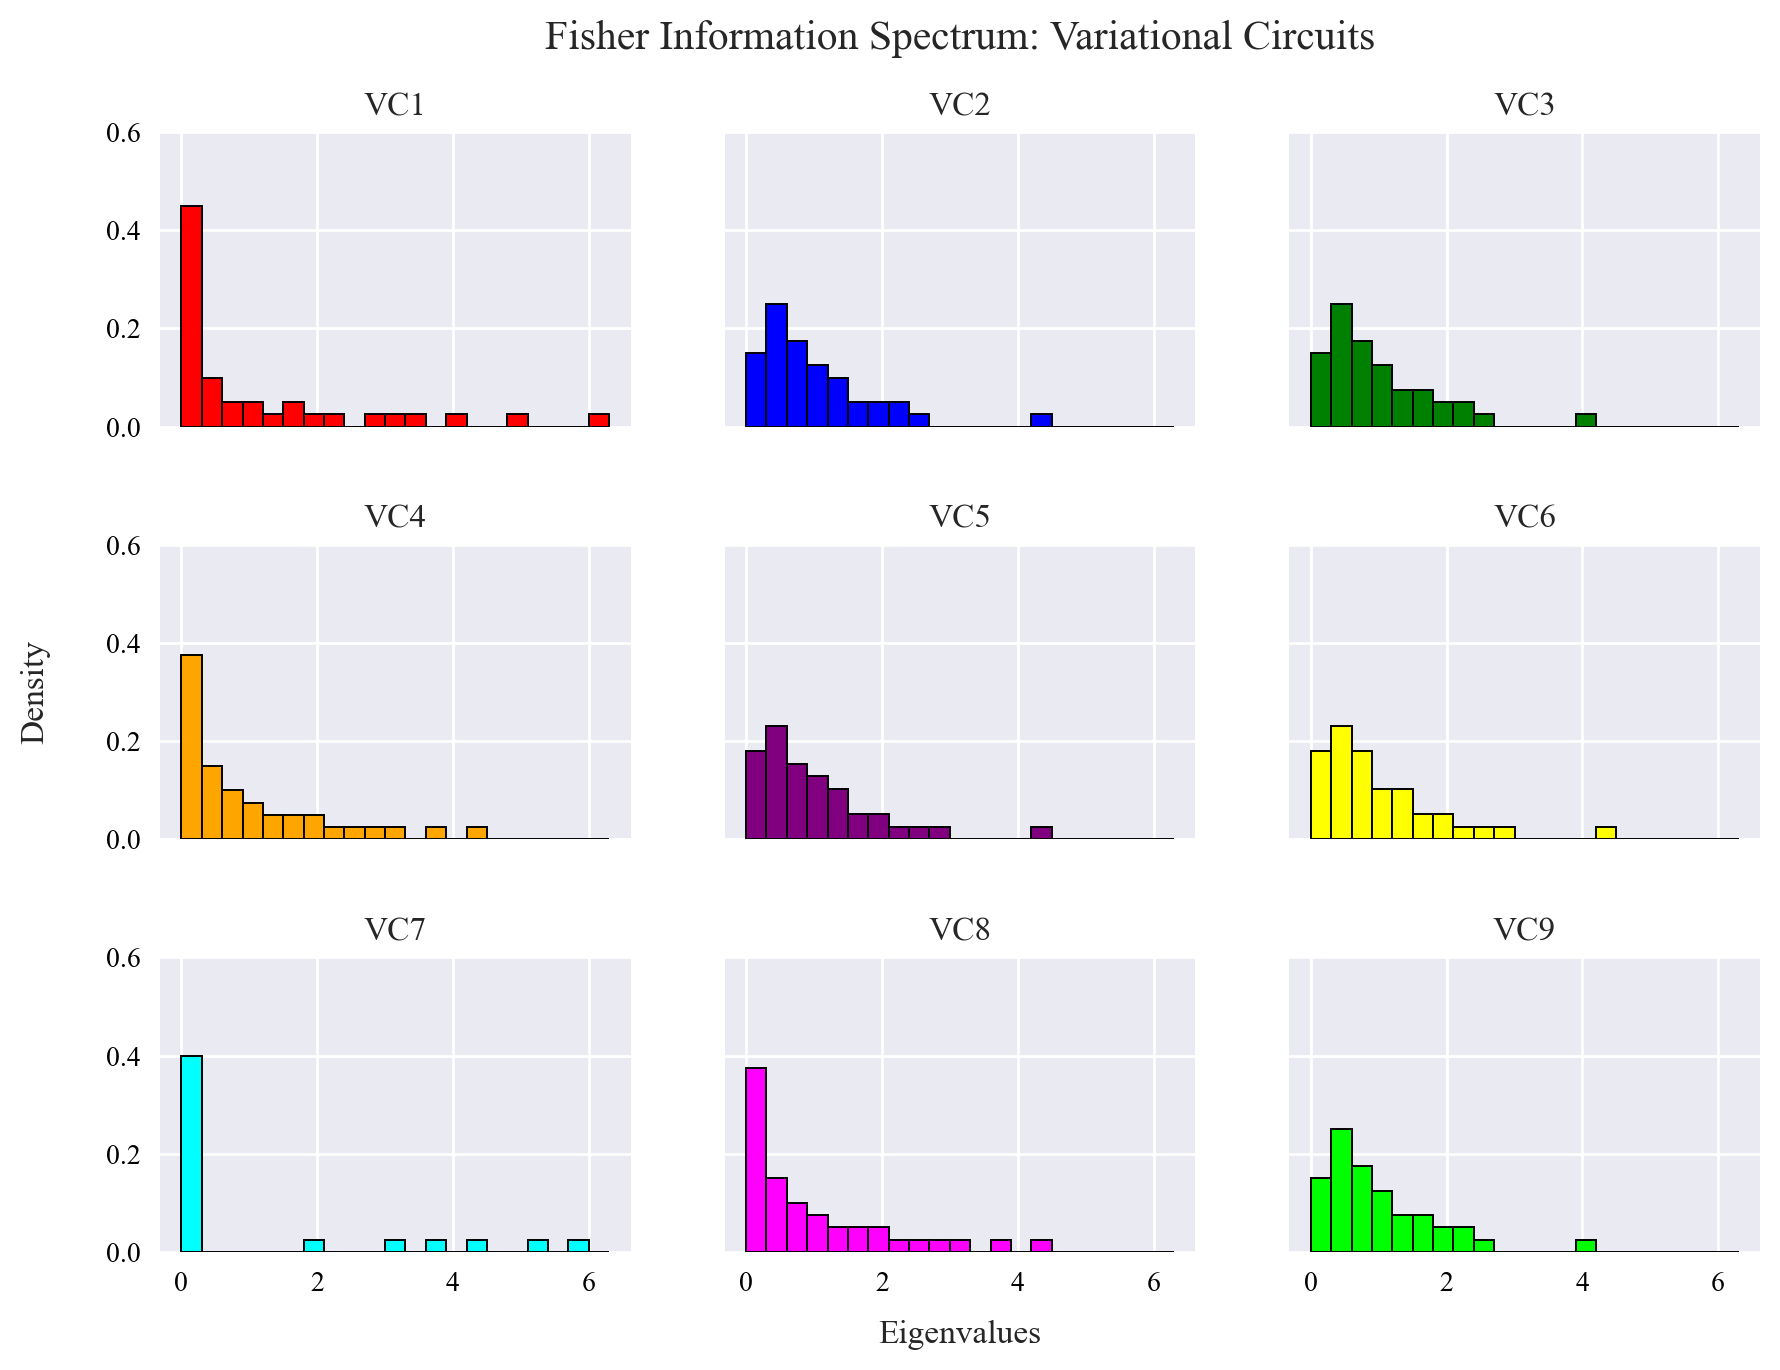

In [13]:
eig_val = {}

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,7),dpi=200)
from matplotlib import rc
import matplotlib.pylab as plt

# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
fig.suptitle('Fisher Information Spectrum: Variational Circuits',fontsize=15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)


for index,file in enumerate(titles_vc):
    eig_val[file] = []
    for i in range(100):
        eig_val[file].append(np.linalg.eigh(VC_norm_fisher[file][i])[0])
    eig_val[file] = np.average(eig_val[file], axis=0)

    axes[index//3,index%3].hist(eig_val[file], bins=np.arange(0,6.5,0.3),weights=np.zeros_like(eig_val[file]) + 1. / eig_val[file].size,color=colors_vc[index],edgecolor='black',linewidth=0.7)
    axes[index//3,index%3].set_ylim((0,0.6))
    axes[index//3,index%3].set_title(titles_vc[index])

fig.supxlabel('Eigenvalues',y=0.03)
fig.supylabel('Density',x=0.03)
plt.savefig('../Figures/VC_fisher_spectrum.png',dpi=300)
plt.show()